Setup for Python

In [29]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

## Elevator Problem

This defines the elevator function, which uses the random library to tell us whether an elevator is coming up or going down when a person presses the button at the second floor.

This code returns `False` if the elevator is on the first floor (and therefore, the first elevator to the second floor will be going up) and `True` otherwise.

In [30]:
def elevator():
    if random.randrange(1,7) == 1:
        return False
    else:
        return True

N = 100000
data = [elevator() for i in range(N)]
print("Expected value: ", 5/6)
print("Actual value: ", sum(data)/N)

Expected value:  0.8333333333333334
Actual value:  0.83252


We can see that the actual value is very close to the expected value, which tells us that the code is working properly.

Now we have to generate numbers for two elevators. To do so, we decide which floor each elevator is on (excluding the second floor) and then check whether any of the elevators are on the first floor. This code will return `True` if an elevator is on the first floor, so to get our probability, we have to subtract the probability of an elevator being on the first floor from the probability of everything (1).

In [50]:
def elevator2(num):
    return [random.randrange(1,7) for j in range(num)]

def experiment(elevs):
    return any(y == 1 for y in elevs)


N = 100000
data2 = [experiment(elevator2(2)) for i in range(N)]
print(1 - sum(data2)/N)

0.6939299999999999


Finally, in this section, I tested how likely it would be that the first elevator was going down if there were three elevators in the building.

In [32]:
N = 100000
data3 = [experiment(elevator2(3)) for i in range(N)]
print(1 - sum(data3)/N)

0.57968


## The Forgetful Burglar

We know that the burglar has an equal chance of moving backwards or forwards, and from each of those, the burglar has an equal chance of moving one or two spaces. I chose to select whether the burglar would move forwards or backwards first, then choose whether she would move one or two spaces in that direction (and as we know from statistics, 1/2 chance of moving left or right * 1/2 chance of moving one or two spaces = 1/4, which is correct because we know that there are 4 potential places for the burglar to go).

Mean =  3.819
steps 	 probability
2 		 0.2532
3 		 0.2857
4 		 0.193
5 		 0.1201
6 		 0.0631
7 		 0.0377


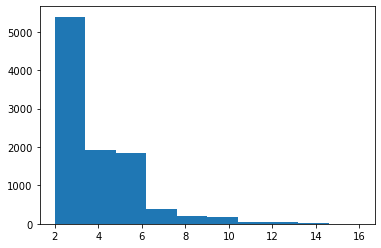

In [33]:
def experiment():
    location = 0
    visited = []
    moves = 0
    while location not in visited:
        visited.append(location)
        addorsub = random.randrange(0, 2)
        if addorsub == 0:
            location -= random.randrange(1,3)
        else:
            location += random.randrange(1,3)
        moves += 1
    return moves

N = 10000
data4 = [experiment() for i in range(N)]
print("Mean = ", sum(data4)/N)

print("steps \t probability")
print(2, "\t\t", data4.count(2)/N)
print(3, "\t\t", data4.count(3)/N)
print(4, "\t\t", data4.count(4)/N)
print(5, "\t\t", data4.count(5)/N)
print(6, "\t\t", data4.count(6)/N)
print(7, "\t\t", data4.count(7)/N)

df = plt.hist(data4)

Here, we can see that the burglar has about a one in two chance of being caught in three or fewer moves, and the burglar will be caught in five steps or fewer in about 4 out of every 5 times.

## Parrondo's Paradox

In both of these games, if the coin lands heads up, the player gains one dollar, and if the coin lands tails up, the player loses a dollar.

This first section defines game B. In game B, if the amount of money that the player has is a multiple of 3, they flip the first coin, which has a $.1 - \epsilon$ chance of landing heads. Otherwise, they flip coin B, which has a $.75 - \epsilon$ chance of landing heads. For the purposes of this experiment, $\epsilon = 0.005$

In [34]:
def gameB(M):
    # if capital is a multiple of 3, choose coin A
    if M % 3 == 0:
        # If heads, you win
        if random.random() <= .1 - 0.005:
            return True
        # If tails, you lose
        else:
            return False
    # Otherwise, choose coin B
    else:
        # If heads, you win
        if random.random() <= .75 - 0.005:
            return True
        # If tails, you lose
        else:
            return False


This code cell defines game A. In game A, the player flips one coin, which has a $.5 - \epsilon$ chance of landing heads.

In [35]:
def gameA():
    if random.random() < .5 - 0.005:
        return True
    else:
        return False

This code cell defines the game switching between A and B. There is a 50% chance of choosing each game.

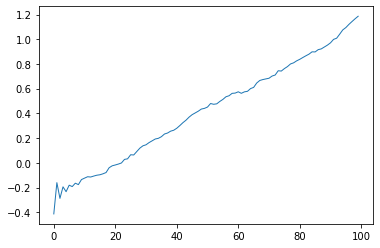

In [36]:
def coinExperiment(M, l):
    games = []
    for i in range(l):
        if random.randrange(0,2) == 1:
            # play gameB
            outcome = gameB(M)
        else:
            # Play gameA
            outcome = gameA()
        # If the outcome is heads, gain a dollar
        if outcome:
            M += 1
        # If the outcome is tails, lose a dollar
        else:
            M -= 1
        games.append(M)
    return games

play = [coinExperiment(0, 100) for i in range(10000)]

x = range(0,100)
y = np.average(play, axis=0)
fig, ax = plt.subplots()

ax.plot(x,y,linewidth = 1.0)
plt.show()

The outcome of this game is odd because, on average, this is a winning game. This doesn't seem like it should be the outcome, because both games, on their own, are losing games.

## Monte Carlo Integration

Problem 1: Estimate area under the graph of $f(x) = x^3 - x$ between -1 and 0

In [37]:
def area1():
    randomY = random.random() * (1 - 0)
    randomX = random.random() * (-1 - 0)
    if randomY < math.pow(randomX, 3) - randomX:
        return True
    else:
        return False

N = 10000000
print(sum([area1() for i in range(N)])/N)

0.2501452


Problem 2: Estimate the area under the graph of $f(x) = e^{-x}$ from $x=0$ to $x=1$, $x=10$, and $x=100$

In [38]:
# def highestY(x):
#     highest = 0
#     newRange = x * 100
#     for i in range(newRange):
#         if math.exp(-i/100) > highest:
#             highest = math.exp(-i/100)
#     return highest

def findArea(y, x):
    randomY = random.random() * y
    randomX = random.random() * x
    if randomY < math.exp(-randomX):
        return True
    else:
        return False

N = 100000000
# highesty1 = highestY(1)
# highestY10 = highestY(10)
# highestY100 = highestY(100)
print(sum([findArea(1, 1) for i in range(N)])/N)
print((sum([findArea(1, 10) for i in range(N)])/N) * 10)
print((sum([findArea(1, 100) for i in range(N)])/N) * 100)

0.63223131
0.9993014
0.999566


Problem 3: Estimate area under curve $f(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}$ from -1 to 1 and from -2 to 2

In [48]:
def findArea(top, bottom, left, right):
    randomY = random.random() * (top - bottom) + bottom
    randomX = random.random() * (right - left) + left
    if randomY < (1 / math.sqrt(2 * math.pi)) * math.exp(- math.pow(randomX, 2) / 2):
        return True
    else:
        return False

N = 100000000
var = sum([findArea(1, 0, -1, 1) for i in range(N)])/N * (1 + 1)
print(var)
print(sum([findArea(1, 0, -2, 2) for i in range(N)])/N * (2 + 2))

0.68266008
0.95445956


Problem 4: In order to estimate the area under the curve from $x = -\infty$ to $x = 1$, I would find the area under the curve from -4 to 4, -6 to 6, -10 to 10, and see what that number is approaching and then divide by two and add half of the area from -1 to 1.

In [46]:
print(sum([findArea(1, 0, -5, 5) for i in range(N)])/N * 10)
print(sum([findArea(1, 0, -7, 7) for i in range(N)])/N * 14)
print(sum([findArea(1, 0, -10, 10) for i in range(N)])/N * 20)

0.9999367000000001
1.00043748
0.9994718


This appears to be approaching $1$, so let's do the calculation.

In [47]:
print(1/2 + var / 2)

0.84140014


So I would say that the area is somewhere around $0.84$.